In [6]:
# Simple change detection - image differencing on Sentinel2 satellite imagery 
# May 2021, RTS
#-------------------------------------------------------------------------------
# Notes:
# Ensure the file sentinel2_helper.py is in the correct locatation (see below).

# Process:
# Get two sentinel2 satellite payloads from the same geolocation and different times
# Perform some operation (ndvi, nbr, etc) on each of the satellite image sets with the
# jupyter notebook sentinel2_bandoperations.ipynb.
# Place those band operation results in a dedicated folder (see below).
# Create the difference and overlay images.
#-------------------------------------------------------------------------------

In [1]:
import sys
# Clear all variables (from last session)
sys.modules[__name__].__dict__.clear()
import os, sys, time, random, itertools, shutil

from google.colab import drive
drive.mount('/content/drive')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Mounted at /content/drive


In [ ]:
# All the required installations here
!pip install rasterio --upgrade
!pip install rioxarray --upgrade
!pip install geopandas --upgrade
!pip install earthpy --upgrade

print('\n\nFINISHED installing rasterio rioxarray, geopandas, earthpy....')

In [3]:
# Set the data paths; ensure band operation and tci images are in the searchpath !
start = '/content/drive/MyDrive/your path/'
datapath = start + 'data/'
searchpath = datapath + 'diff/paris/'

#link the path of the sentinel_helper.py file (in the code directory)
codepath = start + 'code/'
sys.path.append(codepath)

#  homebrew
from sentinel2_helper import *

In [4]:
# These are the images you created with one of the band operations.
# Adjust the names accordingly
image1 = 'ndvi_gray_Paris_20210301.jpeg'
image2 = 'ndvi_gray_Paris_20200709.jpeg'
tci = 'TCI_Paris_20210301.jpeg'

# Set the differencing threshold (0 - 255)
threshold = 30 
# Set the difference color
color = 'red'
# Set the alpha channel for blending the tci with the differenc image (0 - 1.0)
alpha = 0.75

# Call the functions
diff_img = create_colored_diff_image(searchpath, image1, image2, threshold, color)
tci_diff = create_tci_diff_image(searchpath, image1, image2, tci,threshold, color, alpha)

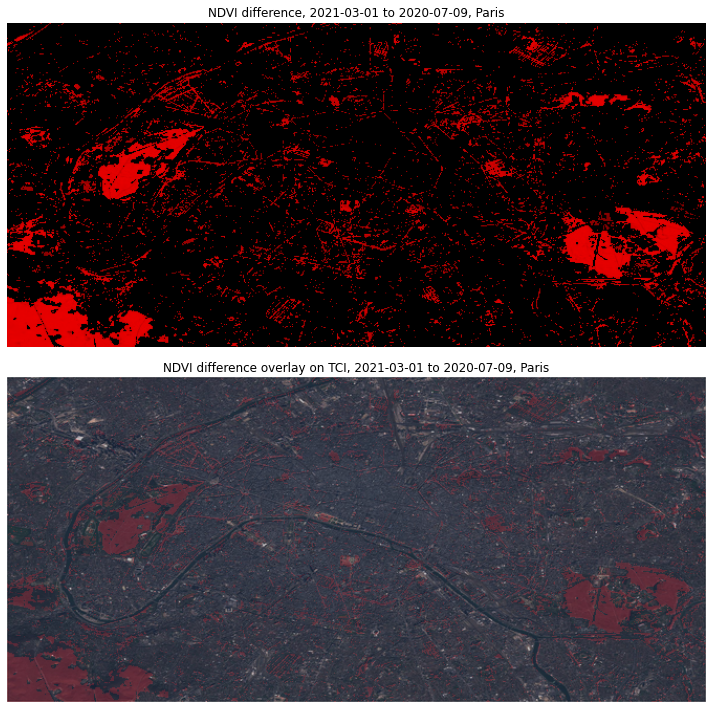

In [5]:
# Display results
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,figsize = (10,10))

# Remove axis
ax[0].axis('off')
ax[1].axis('off')

# Set titles
ax[0].set_title('NDVI difference, 2021-03-01 to 2020-07-09, Paris')
ax[1].set_title('NDVI difference overlay on TCI, 2021-03-01 to 2020-07-09, Paris')

# Show the images
ax[0].imshow(diff_img)
ax[1].imshow(tci_diff)
fig.tight_layout()
plt.show()